### change path below to your gdrive path where folder is 

In [1]:
cd '/content/drive/MyDrive/pavement_competition'

/content/drive/MyDrive/pavement_competition


## Uncomment and run codes below if this is the first time running this notebook

In [3]:
# !pip install -U PyYAML

In [5]:
!pip install -qr dspYolov5/requirements.txt  # install dependencies for yolov5

## If you annotated images from CVAT, uncomment block of codes in cell below to convert cvat annotations to yolo annotations

In [2]:
from dsps.simple_fxn import cvat2yolo
# location of cvat annotations
json_file = 'cvat/annotations/instances_default.json'
img_path = 'cvat/images'
# converted yolo annotations will be stored in the paths below
output_path = 'data/training'
val_path = 'data/validation'
cvat2yolo(json_file,img_path, output_path, val_path)

{1: 'Aligator Crack', 2: 'Transvers Crack', 3: 'Block Crack', 4: 'Edge cracking', 5: 'Sealed Reflective Crack', 6: 'Sealed Longitudinal Crack', 7: 'pothole', 8: 'patching', 9: 'Manholed', 10: 'Spalling', 11: 'Longitudinal Crack', 12: 'Bleeding'}
total number of classes: 12
['Aligator Crack', 'Longitudinal Crack', 'Bleeding', 'Edge cracking', 'Manholed', 'Block Crack', 'Transvers Crack', 'pothole', 'patching', 'Sealed Longitudinal Crack', 'Sealed Reflective Crack', 'Spalling']


## Train a new model

In [3]:
import json
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla P100-PCIE-16GB)


### run the code below. You may get an error the first time. restart the runtime and run again. 

In [6]:
!python -i dspYolov5/train_dsps.py --data dspYolov5/data/dsps.yaml --cfg dspYolov5/models/dsps_model.yaml --batch-size 8 --device 0

In [ ]:
# %run -i yolov5/train_dsps.py --data data/dsps.yaml --cfg models/dsps_model.yaml --batch-size 8 --device 0

### Evaluate and Visualize Model Performance

In [ ]:
# !python 'dspYolov5/detect_dsps.py' --weights 'weights/train/exp/weights/best.pt' --img 640 --conf 0.25 --source data/test_images/
!python 'dspYolov5/detect_dsps.py' --weights 'weights/train/exp10/weights/best.pt' --img 640 --conf 0.25 --source data/test_images/

detect: weights=['weights/train/exp10/weights/best.pt'], source=data/test_images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/drive/MyDrive/pavement_competition/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-430-gaa18599 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7083577 parameters, 0 gradients
image 1/23 /content/drive/MyDrive/pavement_competition/data/test_images/0 (1).JPG: 640x352 2 Transvers Cracks, 1 Manholed, Done. (0.007s)
image 2/23 /content/drive/MyDrive/pavement_competition/data/test_images/0 (104).JPG: 640x352 1 Aligator Crack, 1 patching, Done. (0.006s)
image 3/23 /content/drive/MyD

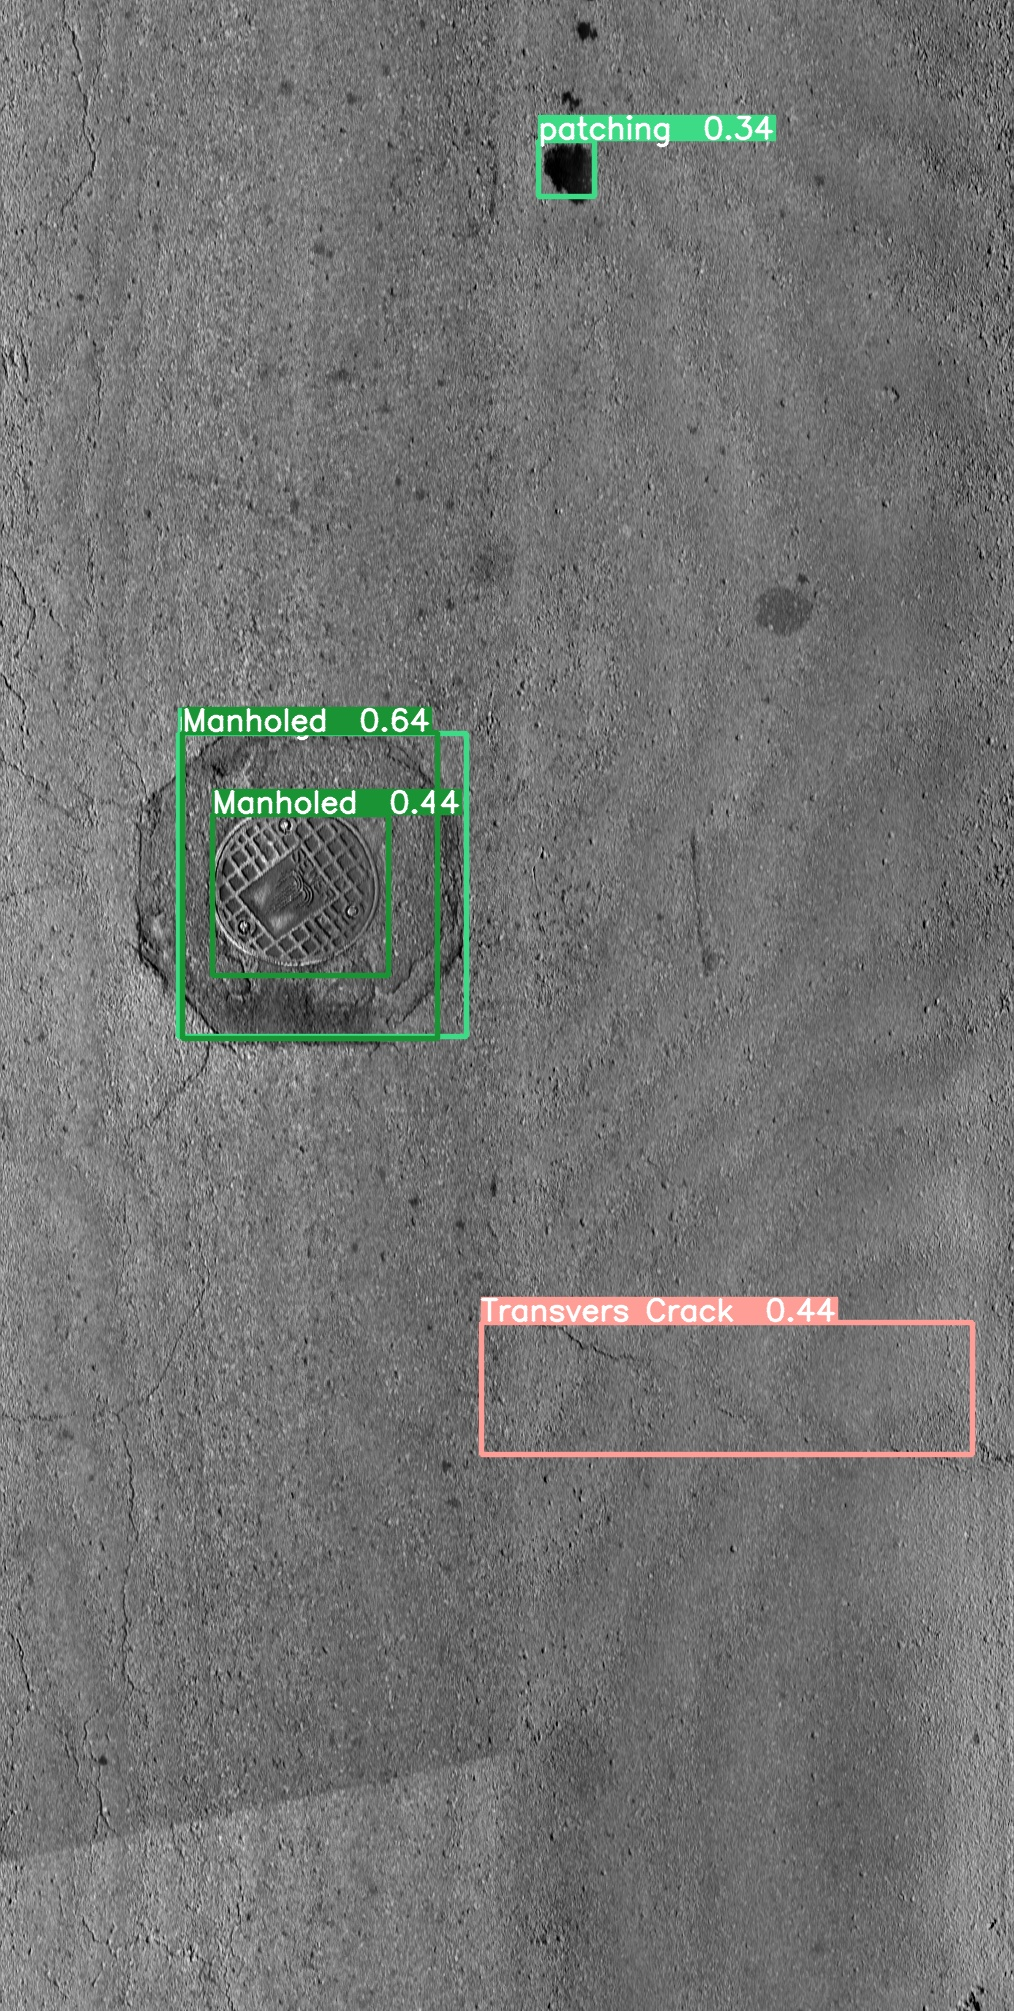

In [ ]:
Image(filename='results/images/0 (11).JPG', width=300)
# Image(filename='results/images/0 (1).JPG', width=300)